# utils2 example: dataset download & experiment tracking

A small example of usage of the [aura-cognitive-utils2](https://github.com/Telefonica/aura-cognitive-utils2) library for two tasks:
 * dataset download
 * tracking of machine learning experiments

In [10]:
import os
import pandas as pd

In [11]:
# Basic imports
from auracog_lib.config.auconfig import AuConfig
from auracog_utils import DEFAULT_CONFIG_NAME

In [12]:
# Create a config object. We need this for everything
cfg = AuConfig(DEFAULT_CONFIG_NAME)

In [13]:
# See the configuraton files we have loaded
print(cfg)

AuConfig['/opt/aura/app/etc/bootstrap.cfg', '/opt/aura/app/etc/aura-utils.cfg']


In [14]:
# This is optional. It will just add some debug messages to some actions
from auracog_utils.misc.notifier import Notifier
ntf = Notifier(level='debug')

## 1. Dataset management
### 1.1 Open the dataset repository

We now open the repository. Remember that the correct password must be available for this to work, either in the configuration file or in the environment variable `AURA_DATASET_PASS`

In [15]:
# Create a repository object
from auracog_utils.repo import AuraRepository

In [16]:
# Open the repository
repo = AuraRepository(cfg, notifier=ntf)

. Repo: http://artifactory.hi.inet/artifactory/misc-aura-datasets
. Repo user: epp


Get the list of datasets in the repository. By default it is returned as a dictionary; since we are in a notebook we change it to return it as a table so we can feed it to Pandas to turn it into a DataFrame for easy visualization

In [18]:
# Get the list of datasets, as a table
repo_items = repo.index(as_table=True)

# Get the first row (column names)
colnames = next(repo_items)

AuraRepositoryException: cannot get http://artifactory.hi.inet/artifactory/misc-aura-datasets/index.csv: 401 Unauthorized

In [ ]:
# Create a dataframe from it
datasets = pd.DataFrame.from_records(repo_items, columns=colnames)

In [ ]:
# See what we've got
datasets

###  1.2 Reading data
We can read a dataset in various ways:

[1] download the dataset to a localfile, using the `get` method. Parameters are
 * dataset name (case insensitive)
 * output directory

In [ ]:
# Get a dataset into a local file
outname = repo.get('ES-MHOME', '.')
print( 'Dataset saved to:', outname)

[2] read online and process on the fly. We use the `open()` method for that, which produces a file-like object

Since the dataset is compressed, we add the `uncompress` keyword to have it uncompress on the fly.

Also, since it's a CSV file, we use a CSV reader to read it

In [15]:
import csv

with repo.open('ES-MHOME', uncompress=True, encoding='utf-8') as f:
    r = csv.reader(f)
    for n, line in enumerate(r):
        print(line)
        if n>10:
            break ## just print out the first 10 lines

AuraRepositoryException: cannot get http://artifactory.hi.inet/artifactory/misc-aura-datasets/index.csv: 401 Unauthorized

[3] finally, the most direct way is to hand it over to Pandas and let it ingest the produced CSV on the fly. 

In this way we get automatically a DataFrame with all the bells and whistles.

In [29]:
# Read into pandas. We open the dataset in uncompress form. The file-like object will produce text CSV data, which
# can then be fed into Pandas read_csv() function

df = pd.read_csv(repo.open('ES-MHOME', uncompress=True, encoding='utf-8'))

AuraRepositoryException: cannot get http://artifactory.hi.inet/artifactory/misc-aura-datasets/index.csv: 401 Unauthorized

In [16]:
# Numer of rows read. We should have the same size as reported in the repository index above
len(df)

NameError: name 'df' is not defined

In [17]:
# Column types
df.dtypes

NameError: name 'df' is not defined

In [18]:
# Sample
df.head()

NameError: name 'df' is not defined

## 2. Dataset stats

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15, 5)

In [20]:
# Test users vs regular users
counts = df[['userId', 'testUser']].drop_duplicates().groupby('testUser').count()
counts

NameError: name 'df' is not defined

In [19]:
# Total interactions of test users vs regular users
counts = df[['userId', 'testUser']].groupby('testUser').count()
counts

,userId
testUser,
0,104758
1,6148


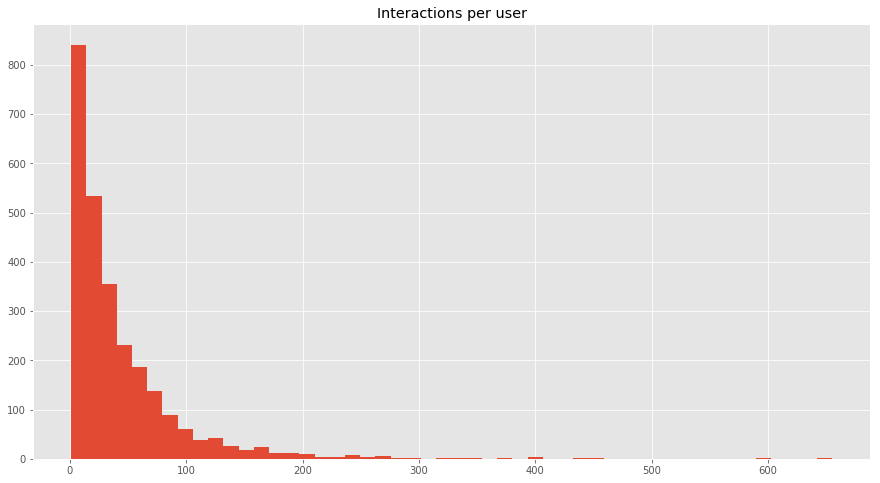

In [20]:
# Histogram of number of user interactions
counts = df[['userId', 'timestamp', 'testUser']].groupby('userId').count()

ax = counts.hist(bins=50, column='timestamp', figsize=(15,8));
ax[0][0].set_title('Interactions per user');

In [21]:
# intent stats
intent_count = df[['userId','intent']].groupby('intent').count().rename(columns={'userId': 'num'})

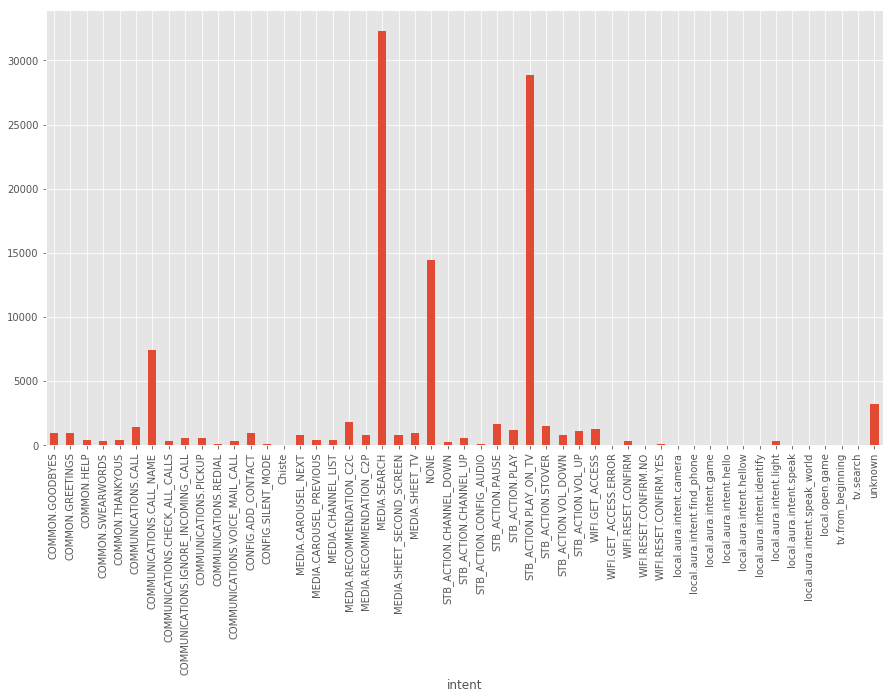

In [22]:
ax = intent_count.plot(kind='bar', legend=None, figsize=(15,8));

In [23]:
intent_count.sort_values(by='num', ascending=False)

,num
intent,
MEDIA.SEARCH,32284
STB_ACTION.PLAY_ON_TV,28865
NONE,14437
COMMUNICATIONS.CALL_NAME,7429
unknown,3234
MEDIA.RECOMMENDATION_C2C,1837
STB_ACTION.PAUSE,1652
STB_ACTION.STOVER,1507
COMMUNICATIONS.CALL,1403


In [24]:
frequent_intents = intent_count[intent_count.num > 1000]

In [25]:
frequent_intents

,num
intent,
COMMUNICATIONS.CALL,1403
COMMUNICATIONS.CALL_NAME,7429
MEDIA.RECOMMENDATION_C2C,1837
MEDIA.SEARCH,32284
NONE,14437
STB_ACTION.PAUSE,1652
STB_ACTION.PLAY,1216
STB_ACTION.PLAY_ON_TV,28865
STB_ACTION.STOVER,1507


## 3. Result tracking

To exercise the tracking API let's develop a quick-and-dirty model for intent classification based on the intent column (the data will therefore be very noisy)

In [26]:
# Clean up the dataset, and keep only the most frequent intents
df_not_null = df[df.intent.notnull()]

df_freq = df_not_null.join(frequent_intents, on='intent')

len(df_freq)

109155

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_freq.utterance, df_freq.intent, 
                                                    test_size=0.33, random_state=42)

### 3.1 Object creation

We create the tracking object

In [28]:
# Import the object
from auracog_utils.tracking import ResultTracker

In [29]:
# Create one object. Define the experiment name in MlFlow
trk = ResultTracker(cfg, exp_name='utils2 test example', notifier=ntf)

. TRK mlflow url: http://cognitive:<MF_PASSWD>@ec2-54-154-99-197.eu-west-1.compute.amazonaws.com/mlflow
. TRK experiment: utils2 test example


In [30]:
print("Server url is:", trk.url)

Server url is: http://cognitive:<MF_PASSWD>@ec2-54-154-99-197.eu-west-1.compute.amazonaws.com/mlflow


In [31]:
# Start a run. Let's add a source name for the run, indicating the machine we trained it on

import socket
name = 'utils2-example@' + socket.gethostname()
trk.start_run(source_name=name)

AuraNetworkRequestException: request to MLFlow server failed: API request to endpoint /api/2.0/preview/mlflow/experiments/list failed with error code 401 != 200. Response body: '<html>
<head><title>401 Authorization Required</title></head>
<body bgcolor="white">
<center><h1>401 Authorization Required</h1></center>
<hr><center>nginx/1.12.2</center>
</body>
</html>
'

### 3.2 Defining the model

Let's define our classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
cv_param = {'strip_accents': 'ascii', 'analyzer': 'char_wb'}
ti_param = {'norm': 'l1'}
rf_param = {'n_estimators': 30, 'max_depth': 20}

pipeline = Pipeline([
        ('vect', CountVectorizer(**cv_param)),
        ('tfidf', TfidfTransformer(**ti_param)),
        ('clf', RandomForestClassifier(**rf_param))
    ])

In [ ]:
# Add some information
trk.add_tags(version='0.0.1')

In [ ]:
# Dump run parameters. We add the prefix of the pipeline module
dump_cv = {'vect-'+k: v for k, v in cv_param.items()}
trk.add_params(**dump_cv)

dump_ti = {'tfidf-'+k: v for k, v in ti_param.items()}
trk.add_params(**dump_ti)

dump_rf = {'clf-'+k: v for k, v in rf_param.items()}
trk.add_params(**dump_rf)

In [ ]:
# Fit the model
model = pipeline.fit(X_train, y_train)

### 3.3 Evaluation

In [ ]:
# evaluate
y_pred = model.predict(X_test)

In [ ]:
import sklearn.metrics as mts

In [ ]:
metrics = {
    'precision macro' : mts.precision_score(y_test, y_pred, average='macro'),
    'precision micro' : mts.precision_score(y_test, y_pred, average='micro'),
    'recall micro' : mts.recall_score(y_test, y_pred, average='micro'),
    'recall macro' : mts.recall_score(y_test, y_pred, average='macro'),
}

In [ ]:
metrics

In [ ]:
trk.add_metrics(**metrics)

We can also upload artifacts, for instance the model itself

In [ ]:
UPLOAD_MODEL = False

if UPLOAD_MODEL:

    import tempfile
    import joblib
    
    with tempfile.TemporaryDirectory() as tmpdir:
        # Save the model to a temporary file
        model_name = os.path.join(tmpdir, 'sklearn_pipeline_model.pkl')
        dump(model, model_name)
        # Upload the file to the server
        trk.add_artifacts(model_name)

In [ ]:
# And close the run
trk.end_run()